# Preliminary EDA

## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import os
import math

In [2]:
path = os.getcwd()
files = os.listdir(path)
print(files[-1])

mergedCRDataset.csv


In [3]:
newPath = path+'\\'+files[-1]
print(newPath)

C:\Users\adhp460\OneDrive - City St George's, University of London\Intro to AI\Project_IntroToAI\mergedCRDataset.csv


In [4]:
crDf = pd.read_csv(newPath,sep='\t')

In [5]:
crDf.head(5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
1,bbfa0d05cac4eb96ebfcb3151d30c243111e16c6ba312d...,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Other theft,Status update unavailable,NaN
2,1cf1e07e2661faf3cb92d95640d0307e162d39f34a8528...,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515659,51.408897,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
3,fc0e7250330288ddd51e71087165804713acf4867b487b...,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
4,e1dcd0b6da831c09fa9bf6c9963e469daa54b0a2de67c2...,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Unable to prosecute suspect,NaN


## Finding the number of Null values in the dataframe

In [6]:
crDf.isnull().sum()

Crime ID                  2984530
Month                           0
Reported by                     0
Falls within                    0
Longitude                  282309
Latitude                   282309
Location                        0
LSOA code                  715465
LSOA name                  715465
Crime type                      0
Last outcome category     3283554
Context                  18102939
dtype: int64

## Finding unique values in all the columns

In [7]:
crDfUniqueSeries = pd.Series({c: crDf[c].unique() for c in crDf})
print(crDfUniqueSeries)

Crime ID                 [nan, bbfa0d05cac4eb96ebfcb3151d30c243111e16c6...
Month                    [2022-10, 2022-11, 2022-12, 2023-01, 2023-02, ...
Reported by              [Avon and Somerset Constabulary, Bedfordshire ...
Falls within             [Avon and Somerset Constabulary, Bedfordshire ...
Longitude                [-2.492876, -2.491146, -2.515659, -2.491616, -...
Latitude                 [51.422716, 51.425008, 51.408897, 51.424619, 5...
Location                 [On or near Trajectus Way, On or near Maximus ...
LSOA code                [E01014399, E01014400, E01014401, E01014402, E...
LSOA name                [Bath and North East Somerset 001A, Bath and N...
Crime type               [Anti-social behaviour, Other theft, Violence ...
Last outcome category    [nan, Status update unavailable, Unable to pro...
Context                                                              [nan]
dtype: object


In [8]:
print(crDfUniqueSeries['Crime type'])

['Anti-social behaviour' 'Other theft' 'Violence and sexual offences'
 'Other crime' 'Public order' 'Robbery' 'Vehicle crime'
 'Criminal damage and arson' 'Bicycle theft' 'Burglary' 'Shoplifting'
 'Drugs' 'Theft from the person' 'Possession of weapons']


## Distribution of Other Column with respect to Target Column

In [9]:
# Source: https://www.statology.org/pandas-count-unique-values/

crDf.groupby('Crime type').nunique()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Last outcome category,Context
Crime type,,,,,,,,,,,
Anti-social behaviour,0,36,43,43,437727,428655,195840,35000,37067,0,0
Bicycle theft,169701,36,44,44,78443,77585,46687,24098,24677,14,0
Burglary,714642,36,44,44,297082,291967,145941,34769,36559,14,0
Criminal damage and arson,1330916,36,44,44,392332,383817,181156,35019,37040,15,0
Drugs,523346,36,44,44,194090,190904,102147,33273,34414,15,0
Other crime,356525,36,44,44,191098,189144,103089,34078,35273,15,0
Other theft,1291464,36,44,44,355259,347217,167869,35041,37031,15,0
Possession of weapons,160921,36,44,44,98483,97981,57669,28886,29543,15,0
Public order,1285368,36,44,44,330307,323954,158079,34978,36904,15,0


## Attemping to split LSOA code

We wanted to see if spliting LSOA code may help in granularity of data, but observing the columns, it is mostly categorical.

In [26]:
crDf['LSOA code'].str.split('0',2,expand=True)

C:\Users\adhp460\AppData\Local\Temp\ipykernel_16332\2606692325.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  crDf['LSOA code'].str.split('0',2,expand=True)


,0,1,2
0,E,1,14399
1,E,1,14399
2,E,1,14399
3,E,1,14399
4,E,1,14399
...,...,...,...
18102934,E,1,34558
18102935,E,1,34558
18102936,E,1,34558
18102937,E,1,25572


## Investigating why there are soo many null latitude and longitude nulls

It mostly has the Last outcome category as Status Update unavailable or Under Investigation even though it contains many of the Crime Types, hence the location data is unavailable.

In [10]:

# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

crLatNullDf = crDf.loc[crDf['Latitude'].isnull()]
crLatNullDf

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
13265,8a4a96d3b3699a7db7e73a6bfbcb7c4bbe75bd472fd070...,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Status update unavailable,NaN
13266,c50fe36f770f1ebc06a2247696da816a4b284b6179ecbb...,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Status update unavailable,NaN
13267,6011b5ed988dcbc33ac772f0cad0d452caf4295653ca1a...,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Status update unavailable,NaN
13268,0bf214fa2fc4dc725b00a647adc6ee4414411310353adc...,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Status update unavailable,NaN
13269,512bfaa2b48e52e8dbaac96fcecd23da182b7b95589aaa...,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Bicycle theft,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18098820,f2ba12d84c4afc7df6dc620b842b5ae17446bcc5520573...,2025-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
18098821,8039c9bc7bd72853cf3070c885c6925cf3a68c9a369e93...,2025-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
18098822,74d751456d9ce1c4e99181bb26902fec1c868dd1fed76e...,2025-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
18098823,a6437739bbc8abb709ff18366ff29fd47f28320ba19b09...,2025-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN


In [11]:
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html
# Source: https://stackoverflow.com/questions/47933213/list-unique-values-in-a-pandas-dataframe

nullLatSeries = pd.Series({c: crLatNullDf[c].unique() for c in crLatNullDf})
print(nullLatSeries)

Crime ID                 [8a4a96d3b3699a7db7e73a6bfbcb7c4bbe75bd472fd07...
Month                    [2022-10, 2022-11, 2022-12, 2023-01, 2023-02, ...
Reported by              [Avon and Somerset Constabulary, Bedfordshire ...
Falls within             [Avon and Somerset Constabulary, Bedfordshire ...
Longitude                                                            [nan]
Latitude                                                             [nan]
Location                                                     [No Location]
LSOA code                                                            [nan]
LSOA name                                                            [nan]
Crime type               [Bicycle theft, Burglary, Criminal damage and ...
Last outcome category    [Status update unavailable, Unable to prosecut...
Context                                                              [nan]
dtype: object


In [12]:
print(nullLatSeries['Crime type'])

['Bicycle theft' 'Burglary' 'Criminal damage and arson' 'Drugs'
 'Other theft' 'Possession of weapons' 'Public order' 'Robbery'
 'Shoplifting' 'Theft from the person' 'Vehicle crime'
 'Violence and sexual offences' 'Other crime' 'Anti-social behaviour']


In [13]:
crLatNullDf.groupby('Crime type').nunique()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Last outcome category,Context
Crime type,,,,,,,,,,,
Anti-social behaviour,0,36,28,28,0,0,1,0,0,0,0
Bicycle theft,3389,36,30,30,0,0,1,0,0,13,0
Burglary,11394,36,30,30,0,0,1,0,0,13,0
Criminal damage and arson,21931,36,32,32,0,0,1,0,0,14,0
Drugs,13253,36,30,30,0,0,1,0,0,15,0
Other crime,10609,36,30,30,0,0,1,0,0,13,0
Other theft,27951,36,31,31,0,0,1,0,0,14,0
Possession of weapons,3367,36,31,31,0,0,1,0,0,12,0
Public order,24993,36,31,31,0,0,1,0,0,14,0


# Data Cleaning    

## Removing Null values

In [14]:
#Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

crCleanDf = crDf.drop(columns=['Crime ID','Last outcome category','Context'])

In [15]:
crCleanDf = crCleanDf.dropna()

In [16]:
crCleanDf.head(5)

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
1,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Other theft
2,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515659,51.408897,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Violence and sexual offences
3,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Violence and sexual offences
4,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Violence and sexual offences


## Splitting Month column into year and month number

In [17]:
# Src: https://stackoverflow.com/questions/14745022/how-to-split-a-dataframe-string-column-into-two-columns
# Src: https://stackoverflow.com/questions/46585193/pandas-error-in-python-columns-must-be-same-length-as-key

crCleanDf[['Year','Month Num']] = crCleanDf['Month'].str.split('-',expand=True)
print(crCleanDf)

            Month                     Reported by  \
0         2022-10  Avon and Somerset Constabulary   
1         2022-10  Avon and Somerset Constabulary   
2         2022-10  Avon and Somerset Constabulary   
3         2022-10  Avon and Somerset Constabulary   
4         2022-10  Avon and Somerset Constabulary   
...           ...                             ...   
18102934  2025-09                Wiltshire Police   
18102935  2025-09                Wiltshire Police   
18102936  2025-09                Wiltshire Police   
18102937  2025-09                Wiltshire Police   
18102938  2025-09                Wiltshire Police   

                            Falls within  Longitude   Latitude  \
0         Avon and Somerset Constabulary  -2.492876  51.422716   
1         Avon and Somerset Constabulary  -2.491146  51.425008   
2         Avon and Somerset Constabulary  -2.515659  51.408897   
3         Avon and Somerset Constabulary  -2.491616  51.424619   
4         Avon and Somerset Const

In [18]:
crCleanDf.head(5)

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Year,Month Num
0,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,2022,10
1,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Other theft,2022,10
2,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515659,51.408897,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,2022,10
3,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,2022,10
4,2022-10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,2022,10


In [19]:
crCleanDf = crCleanDf.drop(columns=['Month'])

In [20]:
# Src = https://www.geeksforgeeks.org/python/how-to-move-a-column-to-first-position-in-pandas-dataframe/

tempCols = ['Year'] + ['Month Num'] + [col for col in crCleanDf.columns if col != 'Year' and col!='Month Num']
print(tempCols)

['Year', 'Month Num', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type']


In [21]:
crCleanDf = crCleanDf.reindex(columns=tempCols)
crCleanDf.head(5)

,Year,Month Num,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
1,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Other theft
2,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515659,51.408897,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Violence and sexual offences
3,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Violence and sexual offences
4,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Violence and sexual offences


In [22]:
crCleanDf.isnull().sum()

Year            0
Month Num       0
Reported by     0
Falls within    0
Longitude       0
Latitude        0
Location        0
LSOA code       0
LSOA name       0
Crime type      0
dtype: int64

# saving cleaned data

Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file

In [23]:
crCleanDf.to_csv('mergedCleanedCRDataset.csv',sep='\t',encoding='utf-8',index=False,header=True)

# Loading cleaned data and Observing the distribution of the crime types

In [6]:
import numpy as np
import pandas as pd
import os
import math

path = os.getcwd()
files = os.listdir(path)
print(files[-2])

newPath = path+'\\'+files[-2]
print(newPath)

crCleanDf = pd.read_csv(newPath,sep='\t')
crCleanDf.head()

mergedCleanedCRDataset.csv
C:\Users\adhp460\OneDrive - City St George's, University of London\Intro to AI\Project_IntroToAI\mergedCleanedCRDataset.csv


,Year,Month Num,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Anti-social behaviour
1,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Other theft
2,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515659,51.408897,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Violence and sexual offences
3,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Violence and sexual offences
4,2022,10,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Violence and sexual offences


In [17]:
# src: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html

targetDist = crCleanDf['Crime type'].value_counts(normalize=True)
print(targetDist)

Violence and sexual offences    0.345162
Anti-social behaviour           0.158195
Criminal damage and arson       0.075512
Shoplifting                     0.074977
Public order                    0.073858
Other theft                     0.073084
Vehicle crime                   0.058217
Burglary                        0.040255
Drugs                           0.029248
Theft from the person           0.020332
Other crime                     0.019715
Robbery                         0.012595
Bicycle theft                   0.009842
Possession of weapons           0.009006
Name: Crime type, dtype: float64


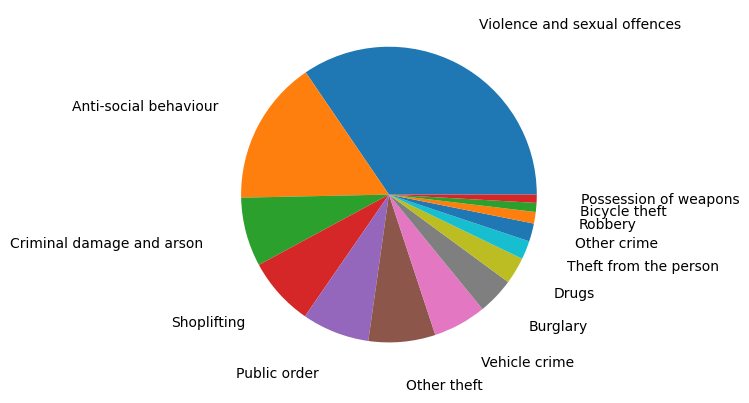

In [23]:
# src: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
import matplotlib.pyplot as plt
plt.pie(targetDist,labels = targetDist.index, labeldistance=1.3)
plt.show()